In [50]:
'''
Takes in a dog breed
Returns a random image of a dog
Inspired by Twitter and a need for stress relief
'''

from IPython.display import display
from PIL import Image
import requests
from io import BytesIO
import json

class Doge:
    def __init__(self, breed):
        self.breed = breed
        self.dogurl = self.get_dog_url(self.breed)
    
    def __call__(self):
        self.get_doge(self.dogurl, self.breed)
        
    def get_doge(self, dogurl, breed):
        imgurl = json.loads(requests.get(dogurl).content)["message"]
        img = Image.open(BytesIO(requests.get(imgurl).content))
        display(img)
    
    def get_dog_url(self, breed):
        breed = self.breed
        return f"https://dog.ceo/api/breed/{breed}/images/random"
    
    def get_breeds(self):
        url = json.loads(requests.get("https://dog.ceo/api/breeds/list/all").content)
        breeds = json.loads(requests.get("https://dog.ceo/api/breeds/list/all").content)["message"]
        print("Breeds:\n")
        for k,v in breeds.items():
            if v == []:
                print(f"{k}")
            else:
                vals = [val for val in v]
                print(f"{k} ({', '.join(vals)})")
                
class Cat:
    
    def __init__(self):
        self.url = "https://api.thecatapi.com/v1/images/search"
        
    def __call__(self):
        caturl = self.url
        imgurl = json.loads(requests.get(caturl).content)[0]["url"]
        img = Image.open(BytesIO(requests.get(imgurl).content))
        display(img)        

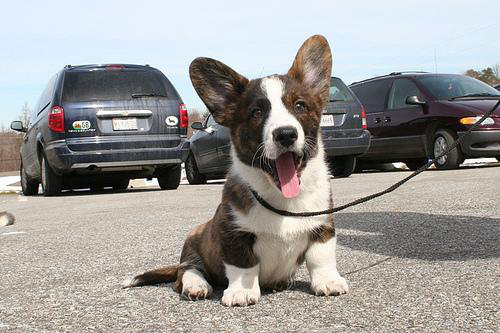

In [37]:
breed = "corgi/cardigan"

doge = Doge(breed)
doge()